/var/folders/vs/kcjt58gj02q7hl49djt4j_v80000gn/T/ipykernel_96562/2656479007.py:30: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
/var/folders/vs/kcjt58gj02q7hl49djt4j_v80000gn/T/ipykernel_96562/2656479007.py:31: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
/var/folders/vs/kcjt58gj02q7hl49djt4j_v80000gn/T/ipykernel_96562/2656479007.py:32: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


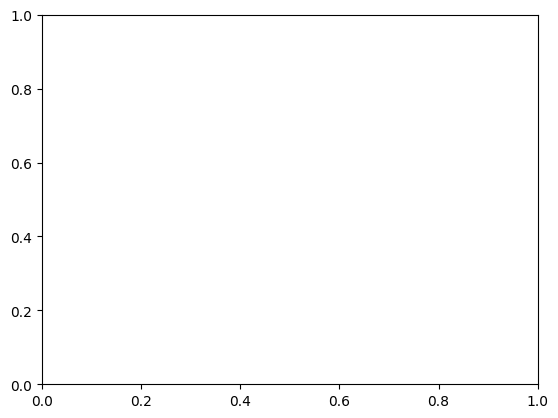

[[223.16433333 223.16433333 223.16433333 223.16433333]
 [223.16433333 223.16433333 223.16433333 223.16433333]
 [223.16433333 223.16433333 223.16433333 223.16433333]
 [223.16433333 223.16433333 223.16433333 223.16433333]]
[[574.1134 574.1134 574.1134 574.1134]
 [574.1134 574.1134 574.1134 574.1134]
 [574.1134 574.1134 574.1134 574.1134]
 [574.1134 574.1134 574.1134 574.1134]]
[[592.0732 592.0732 592.0732 592.0732]
 [592.0732 592.0732 592.0732 592.0732]
 [592.0732 592.0732 592.0732 592.0732]
 [592.0732 592.0732 592.0732 592.0732]]


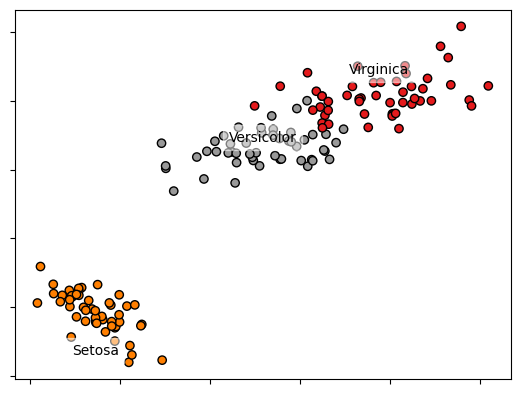

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Visualising the original data (first three features)

fig = plt.figure(1)
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
            1.1*X[y == label, 1].mean(),
            X[y == label, 2].mean(), name,
            horizontalalignment='center',
            bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
    
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Set1,
        edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()


# set the target number of features (dimensions)
k = 2

n_features = X.shape[1]
labels = np.unique(y)

# within-class scatter matrix
S_W = np.zeros((n_features, n_features))
for label in labels:
    xi = X[y == label]
    # increase S_W by a component for class i
    S_W += (len(xi) - 1)*np.cov(xi, rowvar=False)
    
# between-class scatter matrix

# calculate the mean value of the dataset, total_mean
total_mean = np.mean(X, axis=0)

# create an empty array S_B with a proper shape
S_B = np.zeros((n_features,n_features))
for label in labels:
    xi = X[y == label]
    # calculate the mean mi of examples in class i
    mi = np.mean(xi, axis=0)

    S_B += len(xi) * (mi - total_mean).dot((mi - total_mean).T)

# compute the matrix A = S_W^(-1) * S_B
A = np.linalg.inv(S_W).dot(S_B)

# compute the eigenvectors and eigenvalues of A = S_W^(-1) * S_B
eigenvalues, eigenvectors = np.linalg.eigh(A)

# search for indices idx of the eigenvalues sorted in a decreasing order
idx = eigenvalues.argsort()[::-1]

# take the first k eigenvectors (so will be the number of features)
P = eigenvectors[:, idx][:, :k]

# scalar product X*P to get the projected space
new_space = X.dot(P)

if k == 3:
    y = iris.target

    fig = plt.figure(2)
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    plt.cla()
    
    for name, label in [('Setosa', 0), ('Versicolor', 1), ('Virginica', 2)]:
        ax.text3D(new_space[y == label, 0].mean(),
                1.1*new_space[y == label, 1].mean(),
                new_space[y == label, 2].mean(), name,
                horizontalalignment='center',
                bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
        
    # Reorder the labels to have colors matching the cluster results
    y = np.choose(y, [1, 2, 0]).astype(float)

    ax.scatter(new_space[:, 0], new_space[:, 1], new_space[:, 2], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    
    plt.show()
elif k==2:
    y = iris.target

    fig, ax = plt.subplots()

    # plt.clf()
    # plt.cla()
    
    for name, label in [('Setosa', 0), ('Versicolor', 1), ('Virginica', 2)]:
        ax.text(new_space[y == label, 0].mean(),
                1.3*new_space[y == label, 1].mean(),
                name,
                horizontalalignment='center',
                bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

    y = np.choose(y, [1, 2, 0]).astype(float)

    ax.scatter(new_space[:, 0], new_space[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    plt.show()